## A simple Exploratory Data Analysis for DTI data (2022)

#### Exploratory Data Analysis
Exploratory Data Analysis is a way to gain insights, understanding and summarizing data, understanding it’s characteristics, patterns and uncovering relationships or outliers before formal modeling or hypothesis testing is done. EDA can help us to start formalizing the right questions, since wrong questions will givbe wrong answers, and can take a wrong decisions.

## Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [15]:
df = pd.read_csv('complete_dataset.csv')
df = df[df['year'] == 2022]

In [16]:
df.tail(10)

,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9737,Vincenzo A Sagun,2022,0.0,0.2901,1.0053,0.0061,0.3653,0.0334,0.0,0.016,...,0.0,1.9984,0.0866,0.0,0.0,0.3402,1.0,0.1381,0.0044,1.4896
9743,Vintar,2022,0.0,0.1267,1.008,0.0,0.1049,0.0,0.0026,0.0027,...,0.0357,1.9231,0.0186,0.0,0.0003,0.0,1.5002,0.0,0.0275,1.516
9749,Vinzons,2022,0.0202,0.1468,1.0005,0.0,0.379,0.0,0.018,0.0208,...,0.0042,0.6657,0.0849,0.0333,0.0035,0.0962,1.5071,0.9681,0.0103,1.002
9755,Virac,2022,0.0443,0.3753,1.008,0.0,0.0945,0.0,0.0029,0.0362,...,0.0,1.9744,0.1125,0.0,0.0416,0.0,1.5,0.0,0.0293,1.5012
9761,Wao,2022,0.0,0.1394,1.004,0.0237,0.0895,0.0,0.0019,0.0127,...,0.0006,1.8462,0.0111,0.6154,0.0004,0.0,1.5001,0.0014,0.0123,1.2591
9767,Zamboanga,2022,0.1106,0.182,1.0323,0.0,1.3451,0.1469,0.4046,0.7685,...,0.5329,1.689,0.0471,0.1597,0.0015,0.2203,1.7706,0.4532,0.165,1.2614
9773,Zamboanguita,2022,0.0546,0.3488,1.001,0.0006,0.4617,0.0,0.0507,0.0,...,0.0,1.9997,0.0403,0.0833,0.0003,0.3923,1.5,1.0392,0.0037,1.5006
9779,Zaragoza,2022,0.0,0.4277,1.002,0.0,0.4138,0.0,0.0402,0.0278,...,0.0042,1.9991,0.2784,0.0954,0.001,0.3896,1.5001,1.1645,0.0135,1.5025
9785,Zarraga,2022,0.0123,0.4176,1.003,0.006,0.4617,0.0,0.0418,0.0077,...,0.0095,1.9984,0.1837,0.112,0.0009,0.3141,1.5003,0.962,0.0134,1.5003
9791,Zumarraga,2022,0.0,0.2099,0.0,0.0,0.2666,0.0017,0.0004,0.008,...,0.0,1.9991,0.0605,0.1042,0.0,0.0,1.0002,0.0,0.002,1.5008


In [17]:
df1 = df.iloc[:, 2:] 

In [18]:
# finding columns with value "-"
columns_with_mins = df1.eq('-').all()
columns_with_mins = columns_with_mins[columns_with_mins].index.tolist()
print(columns_with_mins)

[]


In [19]:
# finding rows with all value "-"
rows_with_mins = df1.eq('-').all(1)
rows_with_mins = df1[rows_with_mins].index.tolist()
print(rows_with_mins)

[4925, 6053, 7901]


In [20]:
# finding rows with any value "-"
rows_any_mins = df1.eq('-').any(1)
rows_any_mins = df1[rows_any_mins].index.tolist()
print(rows_any_mins)

[659, 1151, 2375, 3179, 3257, 4925, 5237, 5675, 6053, 7451, 7577, 7901, 8183, 9599]


Based on the data, there are variables that has both 0.0000 and -, hence we cannot replace - with 0.0000. As a result, I will remove rows with any "-"

In [21]:
# Removing the rows

mask = ~df1.index.isin(rows_any_mins)
df1 = df1[mask]

In [22]:
df1.head()

,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
5,0.0,0.0662,1.002,0.0,0.0945,0.0,0.0019,0.0022,0.0028,2.0,...,0.0117,1.6667,0.0341,0.0,0.0001,0.0,1.0002,0.0014,0.0032,1.5007
11,0.0,0.0498,1.008,0.0,0.0035,0.0,0.0005,0.0018,0.0012,0.0,...,0.005,0.0,0.0042,0.0291,0.0001,0.0,1.5002,0.0004,0.0322,1.5011
17,0.0246,0.792,1.002,0.1194,0.4548,0.0,0.4707,0.0598,0.2974,1.0,...,0.0095,1.9997,0.3706,0.2537,0.0011,0.4603,1.5,0.9985,0.0229,1.5093
23,0.0518,0.3012,1.002,0.0,0.3911,0.0,0.1017,0.0119,0.0993,2.0,...,0.0,0.0,0.2666,0.05,0.0017,0.2501,1.5,0.0026,0.0071,1.5
29,0.0,0.1413,0.0,0.0037,0.004,0.0,0.0019,0.0758,0.0026,2.0,...,0.0061,1.9744,0.0386,0.0,0.002,0.0,1.5002,0.0,0.0255,1.5039


In [23]:
df1.loc[[5]]

,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_internet_service,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,...,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
5,0.0,0.0662,1.002,0.0,0.0945,0.0,0.0019,0.0022,0.0028,2.0,...,0.0117,1.6667,0.0341,0.0,0.0001,0.0,1.0002,0.0014,0.0032,1.5007


In [24]:
print("Original dataset",df.shape)
print('New dataset', df1.shape)

Original dataset (1632, 42)
New dataset (1618, 40)


Merging df and df1 since df1 has no municipal name included

In [25]:
df_merged = pd.merge(df, df1, left_index= True, right_index= True)

In [26]:
df_merged.tail(10)

,city_municipality,year,accommodation_capacity_x,active_establishments_in_the_locality_x,annual_disaster_drill_x,availability_of_basic_internet_service_x,availability_of_basic_utilities_x,budget_for_drrmp_x,capacity_of_health_services_x,capacity_of_school_services_x,...,presence_of_business_and_professional_organizations_y,presence_of_investment_promotion_unit_y,productivity_y,recognition_of_performance_y,road_network_y,safety_compliant_business_y,sanitary_system_y,social_protection_y,transportation_vehicles_y,utilities_y
9737,Vincenzo A Sagun,2022,0.0,0.2901,1.0053,0.0061,0.3653,0.0334,0.0,0.016,...,0.0,1.9984,0.0866,0.0,0.0,0.3402,1.0,0.1381,0.0044,1.4896
9743,Vintar,2022,0.0,0.1267,1.008,0.0,0.1049,0.0,0.0026,0.0027,...,0.0357,1.9231,0.0186,0.0,0.0003,0.0,1.5002,0.0,0.0275,1.516
9749,Vinzons,2022,0.0202,0.1468,1.0005,0.0,0.379,0.0,0.018,0.0208,...,0.0042,0.6657,0.0849,0.0333,0.0035,0.0962,1.5071,0.9681,0.0103,1.002
9755,Virac,2022,0.0443,0.3753,1.008,0.0,0.0945,0.0,0.0029,0.0362,...,0.0,1.9744,0.1125,0.0,0.0416,0.0,1.5,0.0,0.0293,1.5012
9761,Wao,2022,0.0,0.1394,1.004,0.0237,0.0895,0.0,0.0019,0.0127,...,0.0006,1.8462,0.0111,0.6154,0.0004,0.0,1.5001,0.0014,0.0123,1.2591
9767,Zamboanga,2022,0.1106,0.182,1.0323,0.0,1.3451,0.1469,0.4046,0.7685,...,0.5329,1.689,0.0471,0.1597,0.0015,0.2203,1.7706,0.4532,0.165,1.2614
9773,Zamboanguita,2022,0.0546,0.3488,1.001,0.0006,0.4617,0.0,0.0507,0.0,...,0.0,1.9997,0.0403,0.0833,0.0003,0.3923,1.5,1.0392,0.0037,1.5006
9779,Zaragoza,2022,0.0,0.4277,1.002,0.0,0.4138,0.0,0.0402,0.0278,...,0.0042,1.9991,0.2784,0.0954,0.001,0.3896,1.5001,1.1645,0.0135,1.5025
9785,Zarraga,2022,0.0123,0.4176,1.003,0.006,0.4617,0.0,0.0418,0.0077,...,0.0095,1.9984,0.1837,0.112,0.0009,0.3141,1.5003,0.962,0.0134,1.5003
9791,Zumarraga,2022,0.0,0.2099,0.0,0.0,0.2666,0.0017,0.0004,0.008,...,0.0,1.9991,0.0605,0.1042,0.0,0.0,1.0002,0.0,0.002,1.5008


In [27]:
# Sanity check
df_merged.shape

(1618, 82)

Examine the numerical data in the dataframe

In [28]:
numerical = df_merged.select_dtypes(include = np.number)
numerical.columns

Index(['year'], dtype='object')

In [29]:
# I will drop year since we know it is 2022

df_merged = df_merged.drop(['year'], axis =1)

Since the only the column year is numerical, we can assume that all of the predictors are object, we then convert all of the predictors to numerical

In [30]:
columns_to_convert = df_merged.columns[1:]
df_merged[columns_to_convert] = df_merged[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [31]:
# sanity check
cat_features = df_merged.select_dtypes(include = np.object)
cat_features.columns

Index(['city_municipality'], dtype='object')

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 5 to 9791
Data columns (total 81 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   city_municipality                                      1618 non-null   object 
 1   accommodation_capacity_x                               1618 non-null   float64
 2   active_establishments_in_the_locality_x                1618 non-null   float64
 3   annual_disaster_drill_x                                1618 non-null   float64
 4   availability_of_basic_internet_service_x               1618 non-null   float64
 5   availability_of_basic_utilities_x                      1618 non-null   float64
 6   budget_for_drrmp_x                                     1618 non-null   float64
 7   capacity_of_health_services_x                          1618 non-null   float64
 8   capacity_of_school_services_x                   

In [33]:
# after exploring the data, it seems like the predictors are repeated e.g. utilities_x, utilities_y
df_merged = df_merged.iloc[:,:41]

## Visualizing the data

In [34]:
df_merged.kurt()

C:\Users\Jomari Arubio\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


accommodation_capacity_x                                  69.065531
active_establishments_in_the_locality_x                    7.712653
annual_disaster_drill_x                                    3.176377
availability_of_basic_internet_service_x                  38.024345
availability_of_basic_utilities_x                          4.928197
budget_for_drrmp_x                                       151.461776
capacity_of_health_services_x                             54.223077
capacity_of_school_services_x                             31.793175
capacity_to_generate_local_resource_x                     49.113011
compliance_to_arta_citizens_charter_x                      4.813816
compliance_to_national_directives_x                       13.101039
cost_of_doing_business_x                                   6.372098
cost_of_living_x                                           4.921411
disaster_risk_reduction_plan_x                            34.757896
distance_to_ports_x                             

In [35]:
df_merged.columns

Index(['city_municipality', 'accommodation_capacity_x',
       'active_establishments_in_the_locality_x', 'annual_disaster_drill_x',
       'availability_of_basic_internet_service_x',
       'availability_of_basic_utilities_x', 'budget_for_drrmp_x',
       'capacity_of_health_services_x', 'capacity_of_school_services_x',
       'capacity_to_generate_local_resource_x',
       'compliance_to_arta_citizens_charter_x',
       'compliance_to_national_directives_x', 'cost_of_doing_business_x',
       'cost_of_living_x', 'disaster_risk_reduction_plan_x',
       'distance_to_ports_x', 'early_warning_system_x', 'education_x',
       'emergency_infrastructure_x', 'employed_population_x',
       'employment_generation_x', 'financial_deepening_x',
       'financial_technology_capacity_x', 'getting_business_permits_x',
       'health_x', 'lgu_investment_x', 'land_use_plan_x',
       'local_economy_growth_x', 'local_economy_size_x',
       'local_risk_assessments_x', 'peace_and_order_x',
       'pre

<AxesSubplot:title={'center':'logarithmic'}, xlabel='active_establishments_in_the_locality_x'>

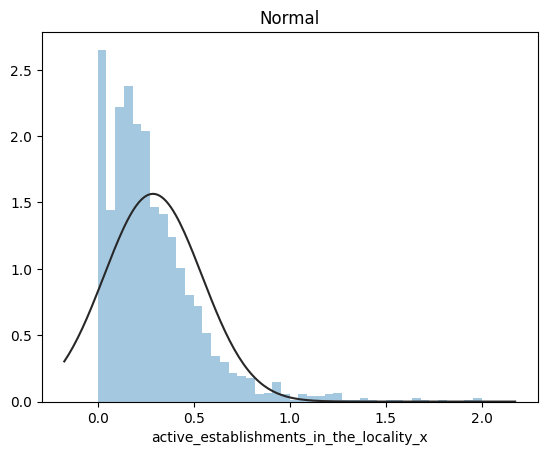

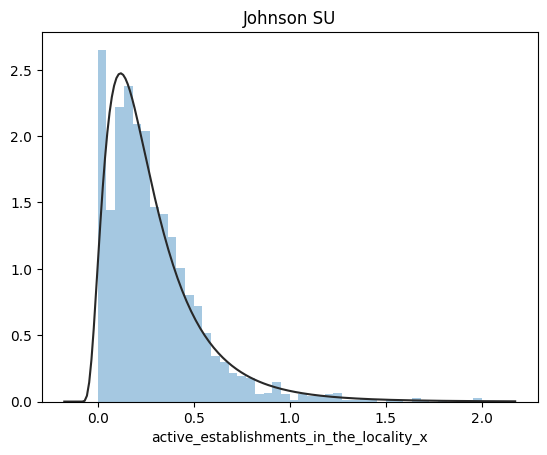

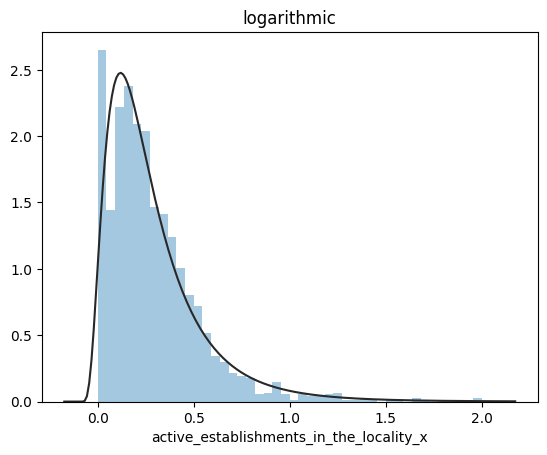

In [36]:
y = df_merged['active_establishments_in_the_locality_x']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(2); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(3); plt.title('logarithmic')
sns.distplot(y, kde=False, fit=st.lognorm)

df_merged.active_establishments_in_the_locality_x. The figures above tell us that the active establishment in the locality feature does  follow normal distribution after transforming it.


## Distribution of all the features

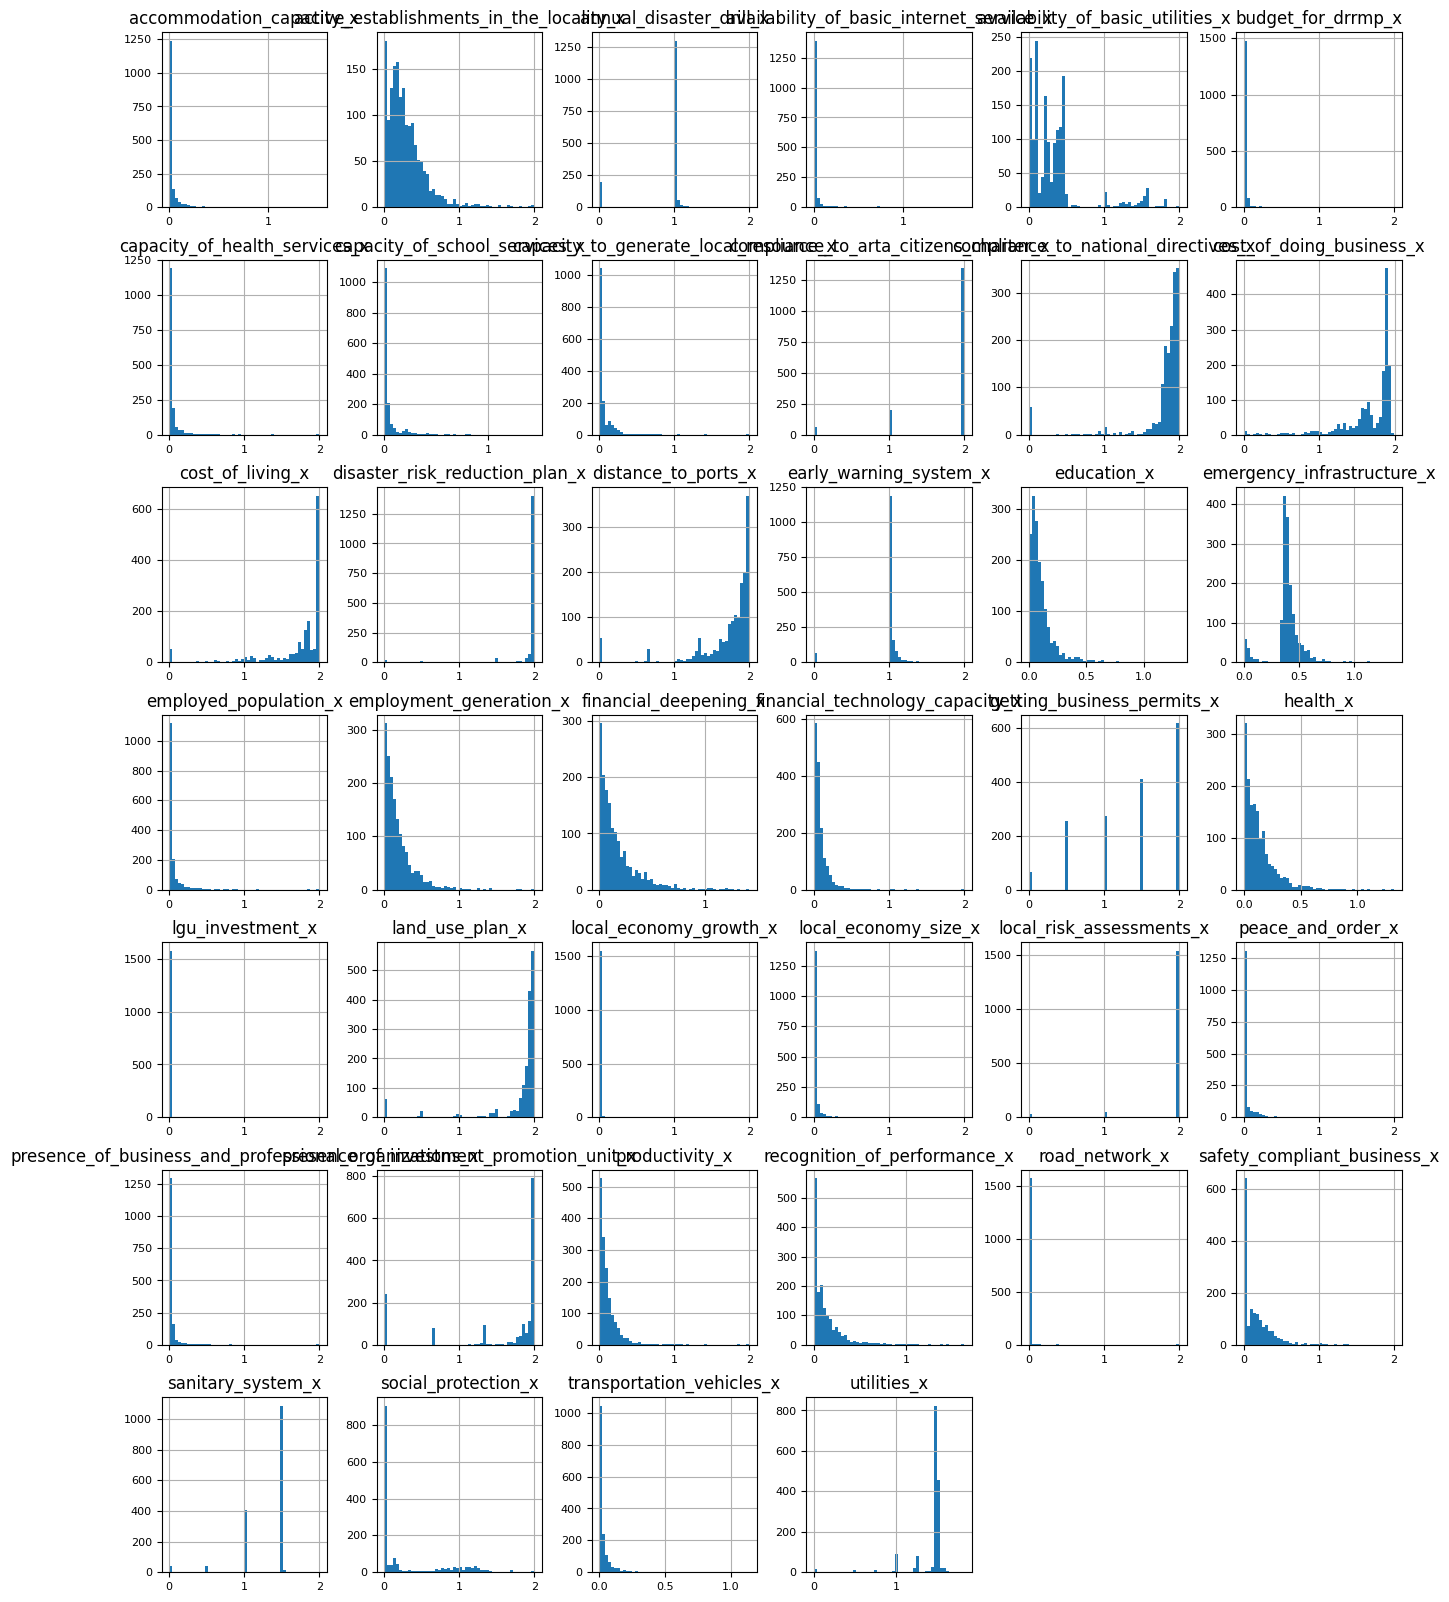

In [37]:
df_merged.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

Only 15 out of 40 of the predictors look good

## Exploring and Visualizing the Correlation

In [38]:
# for climate relatef features

correlation = df_merged.corr()
print(correlation['emergency_infrastructure_x'].sort_values(ascending = False), '\n')

emergency_infrastructure_x                               1.000000
health_x                                                 0.484571
financial_deepening_x                                    0.449139
education_x                                              0.423457
sanitary_system_x                                        0.385620
financial_technology_capacity_x                          0.378780
active_establishments_in_the_locality_x                  0.376540
employed_population_x                                    0.376252
transportation_vehicles_x                                0.361797
early_warning_system_x                                   0.353995
utilities_x                                              0.352847
productivity_x                                           0.322732
local_risk_assessments_x                                 0.321092
accommodation_capacity_x                                 0.318793
land_use_plan_x                                          0.315863
capacity_o

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

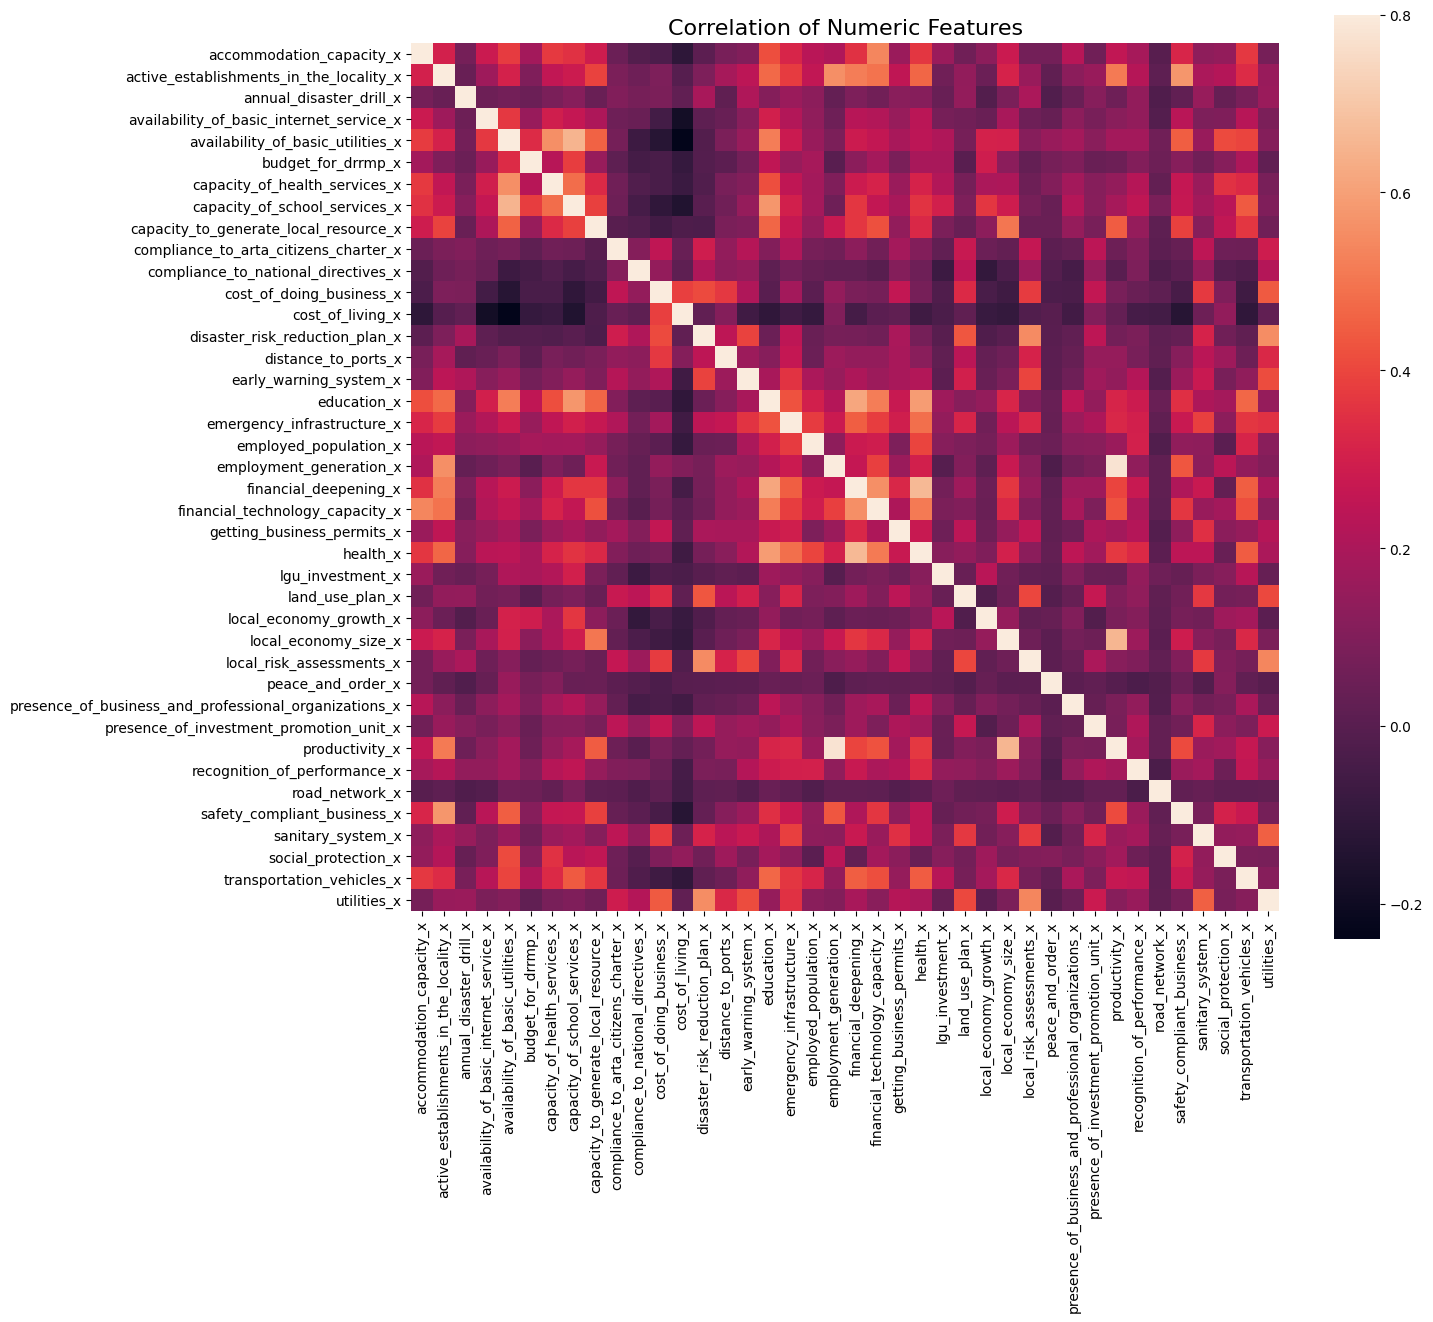

In [39]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

### For Zoomed Correlation

In [40]:
k= 11
cols = correlation.nlargest(k,'disaster_risk_reduction_plan_x')['disaster_risk_reduction_plan_x'].index
print(cols)

Index(['disaster_risk_reduction_plan_x', 'utilities_x',
       'local_risk_assessments_x', 'land_use_plan_x',
       'cost_of_doing_business_x', 'early_warning_system_x',
       'sanitary_system_x', 'compliance_to_arta_citizens_charter_x',
       'emergency_infrastructure_x', 'distance_to_ports_x',
       'presence_of_investment_promotion_unit_x'],
      dtype='object')


<AxesSubplot:>

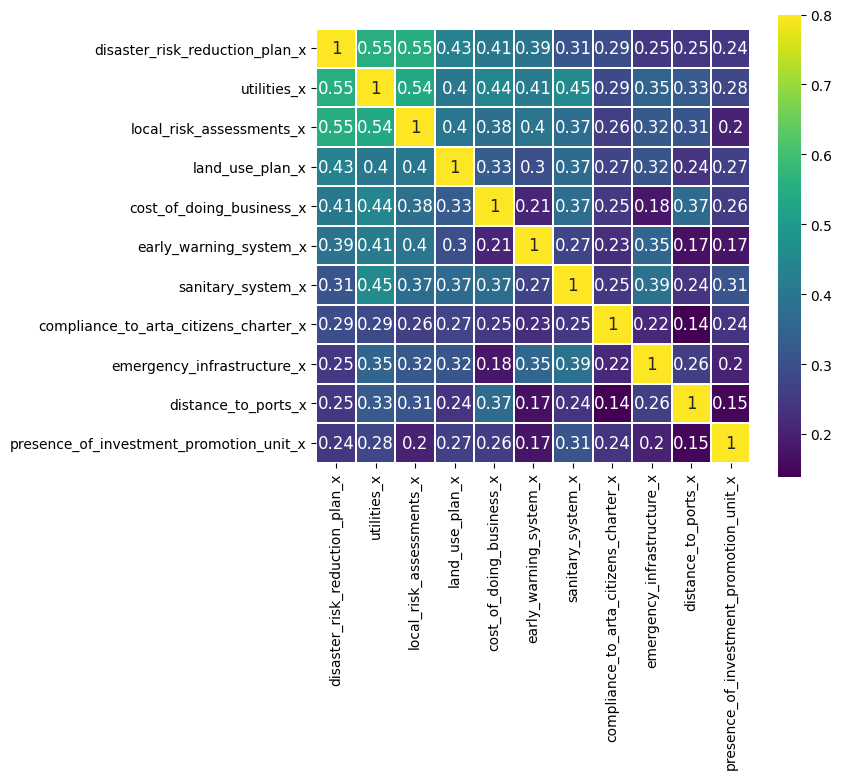

In [41]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (7,6))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [42]:
k= 11
cols = correlation.nlargest(k,'health_x ')['health_x '].index
print(cols)

KeyError: 'health_x '

In [ ]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (7,6))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
k= 11
cols = correlation.nlargest(k,'productivity_x')['productivity_x'].index
print(cols)

In [ ]:
cm = np.corrcoef(df_merged[cols].values.T)
f , ax = plt.subplots(figsize = (8,7))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)